In [19]:
from sympy import *
init_session()

IPython console for SymPy 1.2 (Python 3.6.6-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.2/



In [20]:
A, B, C, u, v, w, x = symbols('A B C u v w x')

In [21]:
p = A*x**2 + B*x + C
q = u*x**2 + v*x + w

In [22]:
expr = (p*q).integrate(x)
p_int = expr.subs(x, 1) - expr.subs(x, 0)

In [86]:
p_half = p.subs(x, Rational(1,2))

In [87]:
p_half

In [70]:
p_int

In [71]:
zero = p_int - p_half

In [72]:
zero

In [73]:
As = (zero.subs(B, 0).subs(C, 0)/A).simplify()
Bs = (zero.subs(A, 0).subs(C, 0)/B).simplify()
Cs = (zero.subs(B, 0).subs(A, 0)/C).simplify()

In [74]:
display(As)
display(Bs)
display(Cs)

In [75]:
M = Matrix([[1/5, 1/4, 1/3], [1/4, 1/3, 1/2], [1/3, 1/2, 1]])
rhs = Matrix([[1/4], [1/2], [1]])
sol = M.LUsolve(rhs)

In [76]:
sol

⎡-15.0000000000001⎤
⎢                 ⎥
⎢15.0000000000001 ⎥
⎢                 ⎥
⎣-1.50000000000002⎦

# Checking

In [89]:
q_new = -15*x**2 + 15*x - Rational(3,2)
display(q_new)
expr_new = (p*q_new).integrate(x)
int_new = expr_new.subs(x, 1) - expr_new.subs(x,0)
display(int_new)
display(p_half)

# Tex

In [96]:
prod_new = (p*q_new).expand()
display( prod_new )
print(latex(prod_new))

- 15 A x^{4} + 15 A x^{3} - \frac{3 A x^{2}}{2} - 15 B x^{3} + 15 B x^{2} - \frac{3 B x}{2} - 15 C x^{2} + 15 C x - \frac{3 C}{2}


In [104]:
int_new = prod_new.integrate(x)
display(int_new)
print(latex(int_new))

- 3 A x^{5} - \frac{3 C x}{2} + x^{4} \left(\frac{15 A}{4} - \frac{15 B}{4}\right) + x^{3} \left(- \frac{A}{2} + 5 B - 5 C\right) + x^{2} \left(- \frac{3 B}{4} + \frac{15 C}{2}\right)


In [105]:
int_eval_new = int_new.subs(x,1) - int_new.subs(x, 0)
display( int_eval_new )
print(latex(int_eval_new))

\frac{A}{4} + \frac{B}{2} + C


# Tent Function

In [123]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

In [124]:
matplotlib.rcParams.update({'font.size': 14})

In [128]:
def tent(x, c, delta):
    if x < c-delta:
        return 0
    elif x<c:
        return (x-(c-delta))/delta
    elif x<c+delta:
        return 1 - (x-c)/delta
    else:
        return 0

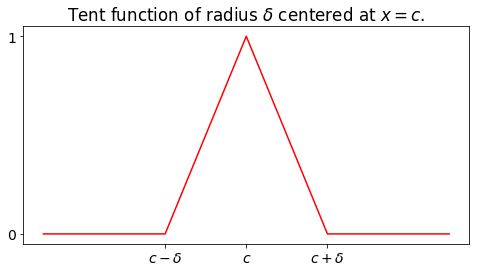

In [136]:
n = 101
xs = [1/(n-1)*i for i in range(n)]
plt.figure(figsize=(8,4))
plt.plot(xs, [tent(x, .5, .2) for x in xs], 'r-')
plt.xticks([.3, .5, .7], ['$c-\delta$', '$c$', '$c+\delta$'])
plt.yticks([0,1], [0,1])
plt.title('Tent function of radius $\delta$ centered at $x=c$.')
plt.show()